ML PROCESS
==========


Terminology
-----------
> \
> `Target variable` (a.k.a. `dependent` variable, `output` variable, `label`)
>   * what you are trying to predict or estimate
>
> `Input variable` (a.k.a. `independent` variable, `explanatory` variable, `predictor`, `feature`)
>   * input variables or features that influence the dependent variable
>       

How the model learns (training vs. test)
----------------------------------------

### Splitting Data
* For a ML model to learn, you need to `split` your data into a `training set` and a `test set`.
    * example data set: 
        * 1 target variable (e.g. liquidity)
        * 5 explanatory variables (e.g. market cap, dept, ebitda, etc.)
        * 100,000 observations

### Training
* When `'training'` the model, the model will review the given `'characteristics'` (input variables) present AND the `'thing'` (target variable) you're trying to predict at a later stage
    * "When the Liquidity (target variable) value was 3884, 'market cap' was 41645, 'total debt' was 9040, ... etc.
* You train the model on `~80%` of your available data (a.k.a. `output variable **AND** input variables`)
    * You show it 80,000 `output:input pairs`, i.e. liquidity and values of 5 input variables x80,000

### Testing
* Once complete, the model should now be able to make `predictions` on what the `target variable SHOULD be`, given a set of 'characteristics' (input variables) 
    * You show the model another observation of the 5 input variables, it should now be able to predict liquidity (the output value)
* You can `'test'` this by feeding the model the remaining `~20%` of characteristics (input variables) you previously reserved and recording the output value the model predicts
* You can now compare the answers the model gave (the values it predicted) to the actual remaining ~20% answers (output values) you previously reserved (which the model hasn't seen, so doesn't know this answer)
* This will determine the models `accuracy`


Model Competition
-----------------

> May the best model class win!

Prior to competition, define process (a.k.a. `model pipeline`!) repeated for each `model class`:

Liquidity regressor algorithm = 2-step pipeline!
1. `standardise` training data to common scale
2. `apply model class` to training data w/ a given random state

> N.B. Standardising data to common scale prevents MLA from overemphasising input features with larger scale. Without this step, input features with larger values could have greater influence on your model!

In [1]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_PATH variable
project_path = os.getenv("PROJECT_PATH")

In [2]:
# Load data

df_liquidity_data = pd.read_csv(os.path.join(project_path, 'liquidity_data.csv'))
df_liquidity_data.head(3)

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


In [3]:
df_liquidity_data.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


Splitting Data
==============

### Define series named `target` containing only the target variable (available_liquidity)

In [4]:

target = df_liquidity_data['available_liquidity']

### Define new df named `inputs` ontaining only the input variables (from liquidity dataset)


In [5]:
# drop column = df.drop('column_name', axis=1)
inputs = df_liquidity_data.drop('available_liquidity', axis=1)

inputs.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0


### Define df named `results` that contains the result of .train_test_split()


In [6]:
results = train_test_split(inputs, target, test_size= 0.2, random_state= 1)

### Verify data was split correctly

In [7]:
print(type(results))
print(len(results))
print('---')
for item in results:
    print(item.shape)

<class 'list'>
4
---
(641, 7)
(161, 7)
(641,)
(161,)


In [8]:
# Unpacking lists

example_list = [1, 2, 3]

one, two, three = example_list

print(one)
print(two)
print(three)

1
2
3


### Unpack `results` from train_test_split( ) into required datasets:
* `input_train`
* `input_test`
* `target_train`
* `target_test`


In [9]:
# Excercise: 

input_train, input_test, target_train, target_test = results

print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(641, 7)
(161, 7)
(641,)
(161,)


### Verify list unpack successful

In [10]:
input_train.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
309,3,16764.94643,1887.019,-483.002,1905.83296,859.71,8653.205


In [11]:
input_test.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
8,8,172479.4798,24842.0,-1674.0,10841.00006,6830.0,39929.0


In [12]:
target_train.head(1)

309    1227.539
Name: available_liquidity, dtype: float64

In [13]:
target_test.head(1)

8    17708.00026
Name: available_liquidity, dtype: float64

Model Pipelines & Standardisation
=================================

### Import model classes, `make_pipeline` & `StandardScaler`

In [14]:
# import libraries

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Create `pipelines`

In [15]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=1)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=1))
}

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# add to dictionary
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))

In [17]:
# verify pipelines

for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


Hyperparameter Grids
====================

### Create `hyperparameter grids`

In [18]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5] # 0.1 is standard, values below and above added for complexity
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [19]:
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200], # n of decision trees
    'randomforestregressor__max_features' : [None, 0.3, 0.6]
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

### Aggregating Hyperparameter Grids

In [20]:
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [21]:
# progress checkpoint

for key in ['lasso', 'ridge', 'enet', 'rf', 'gb']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found.')

lasso was found, and it is a grid.
ridge was found, and it is a grid.
enet was found, and it is a grid.
rf was found, and it is a grid.
gb was found, and it is a grid.


Cross-Validate and Score Liquidity Models
=========================================

1. **`create`** untrained model for each model class
2. **`train`** each model & **`hypertune`** parameters
3. use trained models to **`make predictions`** based on input from training data
4. **`compare`** predictions against actual target values

In [22]:
# 1. Create untrained model for each model class

from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv=5)

In [23]:
print(pipelines.keys())
print('---')
print(hyperparameter_grids.keys())

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])
---
dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [24]:
# Exercise

models = {}
type(models)

dict

In [25]:
# create 'models' dict

for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)

models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [26]:
# 2. Train each model & hypertune parameters

# .fit(input_training_data, target_training_data)
# when executing, hyperparameters will be tuned and model trained

for key in models:
    models[key].fit(input_train, target_train)
    print(key + ' is trained and tuned.')

lasso is trained and tuned.
ridge is trained and tuned.


enet is trained and tuned.
rf is trained and tuned.
gb is trained and tuned.


In [27]:
# 3. Use trained models to make predictions based on input from training data
# 4. compare predictions against actual target values

from sklearn.metrics import r2_score, mean_absolute_error

In [28]:
# make predictions with SciKit Learn .predict() function

lasso_preds = models['lasso'].predict(input_test)
print('R-Squared:', round(r2_score(target_test, lasso_preds), 3))
print('MAE:', round(mean_absolute_error(target_test, lasso_preds), 3))

R-Squared: 0.498
MAE: 1710.083


In [29]:
# Excercise - for-loop to make predictions and compare

for model in models:
    # make predictions
    preds = models[model].predict(input_test)
    # compare model output to real answers
    print(model, '-- R-Squared:', round(r2_score(target_test, preds), 3))
    print(model, '-- MAE:', round(mean_absolute_error(target_test, preds), 3))

lasso -- R-Squared: 0.498
lasso -- MAE: 1710.083
ridge -- R-Squared: 0.5
ridge -- MAE: 1708.062
enet -- R-Squared: 0.501
enet -- MAE: 1706.04
rf -- R-Squared: 0.843
rf -- MAE: 947.763
gb -- R-Squared: 0.886
gb -- MAE: 513.433


Visualise results
=================

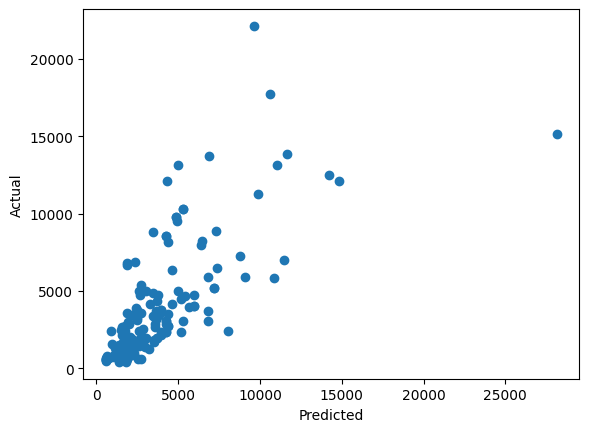

In [30]:
# Make predictions with test data

preds = models['lasso'].predict(input_test)

# Plot predictions on x axis, target_test on y axis
plt.scatter(preds, target_test)

# label axes and show graph
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

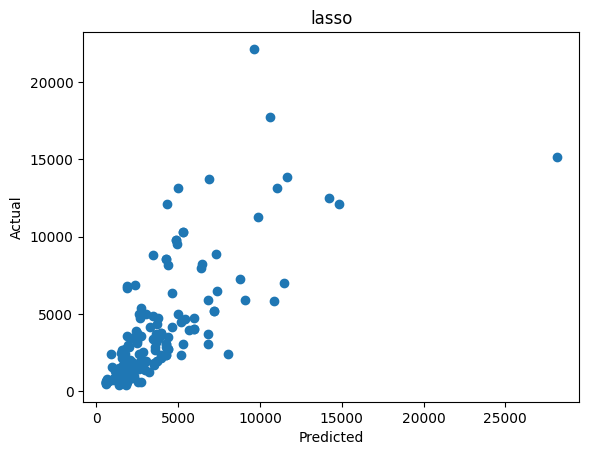

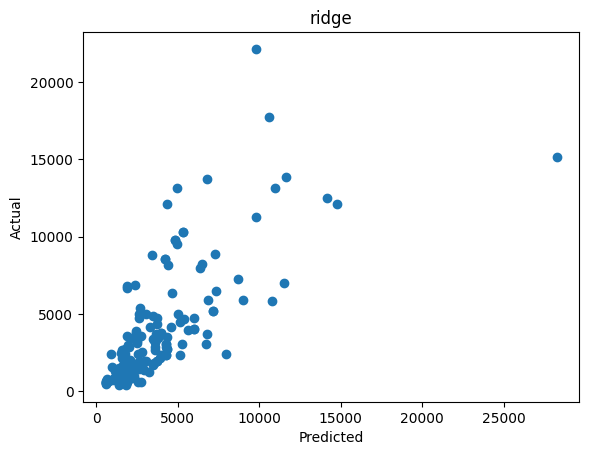

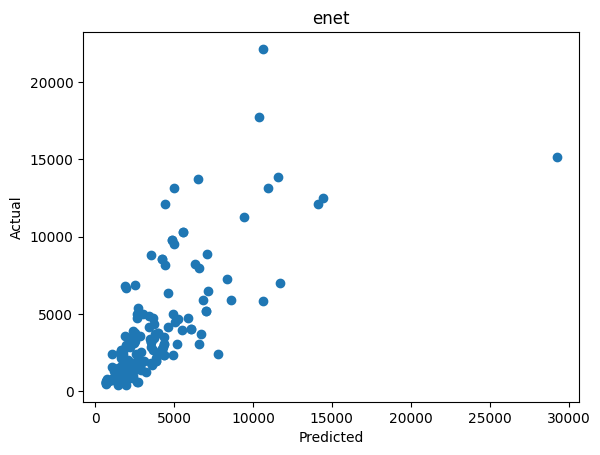

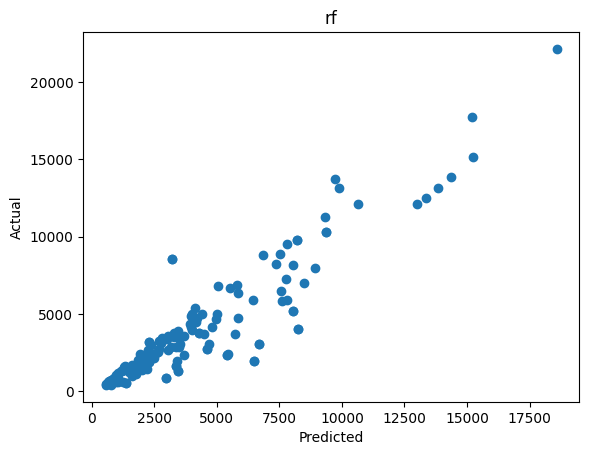

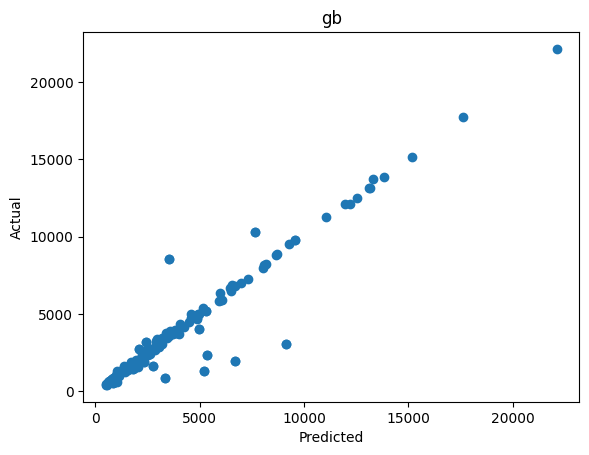

In [31]:
for model in models:

    # Make predictions with test data

    preds = models[model].predict(input_test)

    # Plot predictions on x axis, target_test on y axis
    plt.scatter(preds, target_test)

    # label axes and show graph
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model)
    plt.show()

Using the model
===============

In [32]:
# load data
client = pd.read_csv(os.path.join(project_path, 'liquidity_client.csv'))

# make prediction
models['gb'].predict(client)

array([28673.37496513])